对于一堆输入数据，我们可以用线性回归来拟合它，也可以用二次回归，三次回归，或者 N 次回归来拟合它。在函数逼近理论里，有一个定理叫做 **Weierstrass定理**，该定理阐述了在预先给定的精度下，可以用多项式逼近任意给定的闭区间上的连续函数。

> Weierstrass第一逼近定理：假设 $f(x)$ 是闭区间 [a,b] 上的连续函数，对于任意的 $\epsilon>0$，则存在多项式 $P(x)$ 使得对于所有的 $x\in [a,b]$，有 $|f(x)-P(x)|<\epsilon$。 

也就是说使用多项式回归，随便什么样的输入数据，都可以逼近，因为回归问题的输入本身就是连续且在特定区间内的。多项式回归的表达式如下：

$$
y = \theta_1\phi_1(x) + \theta_2\phi_2(x) + ... + \theta_k\phi_k(x)
$$

其中，$\phi(x) = (1, x, x_2, ..., x^{k-1})^T$，在实际求解中，这里的 k 值不可能取无穷大，一般我们从 k=2 开始（也就是线性模型），得到一个模型，评估模型是否满足条件，不满足的话，取 k=3，依次迭代，直到模型满足条件为止。那么回归问题就可以转变成找一个 k 值，使得模型效果最好。那如何评估模型的好坏呢？这就是这一节要讨论的问题。

我们来看下面的数据：

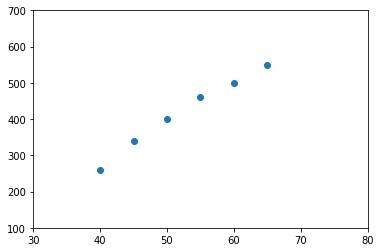

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlim(30, 80)
plt.ylim(100, 700)

X = np.array([40, 45, 50, 55, 60, 65])
Y = np.array([260, 340, 400, 462, 500, 550])
plt.scatter(X, Y)

plt.show()

从图中很显然能看出这是一条直线，我们使用线性回归来求解：

In [14]:
import numpy as np

X = np.matrix([
    [1, 1, 1, 1, 1, 1], 
    [40, 45, 50, 55, 60, 65]]).T
Y = np.matrix([260, 340, 400, 462, 500, 550]).T

a = (X.T * X).I * X.T * Y
print("a = {0}".format(a))

a = [[-178.93333333]
 [  11.38285714]]


得到回归模型：

$$
y = 11.38x - 178.93
$$

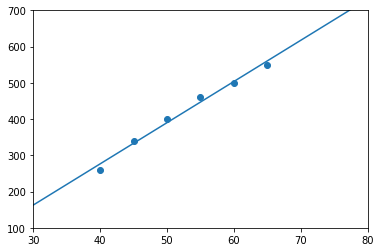

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlim(30, 80)
plt.ylim(100, 700)

X = np.array([40, 45, 50, 55, 60, 65])
Y = np.array([260, 340, 400, 462, 500, 550])
plt.scatter(X, Y)

x = np.linspace(30, 80)
y = 11.38*x-178.93
plt.plot(x, y)

plt.show()

那么这个模型是不是最好的呢？我们不妨再来求解二次回归和三次回归：

In [18]:
import numpy as np

# 不使用科学计数法
np.set_printoptions(suppress=True)

X2 = np.matrix([
    [1, 1, 1, 1, 1, 1], 
    [40, 45, 50, 55, 60, 65],
    [40**2, 45**2, 50**2, 55**2, 60**2, 65**2]]).T
X3 = np.matrix([
    [1, 1, 1, 1, 1, 1], 
    [40, 45, 50, 55, 60, 65],
    [40**2, 45**2, 50**2, 55**2, 60**2, 65**2],
    [40**3, 45**3, 50**3, 55**3, 60**3, 65**3]]).T
Y = np.matrix([260, 340, 400, 462, 500, 550]).T

a2 = (X2.T * X2).I * X2.T * Y
a3 = (X3.T * X3).I * X3.T * Y
print("a2 = {0}".format(a2))
print("a3 = {0}".format(a3))

a2 = [[-635.1       ]
 [  29.23285714]
 [  -0.17      ]]
a3 = [[-1473.77777771]
 [   78.69100529]
 [   -1.12666667]
 [    0.00607407]]


得到二次模型：

$$
y = 29.23x - 0.17x^2 - 635.1
$$

和三次模型：

$$
y = 78.69x - 1.13x^2 + 0.006x^3 - 1473.78
$$

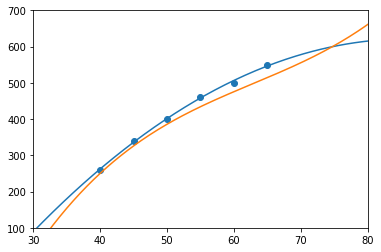

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlim(30, 80)
plt.ylim(100, 700)

X = np.array([40, 45, 50, 55, 60, 65])
Y = np.array([260, 340, 400, 462, 500, 550])
plt.scatter(X, Y)

x = np.linspace(30, 80, 200)
y = 11.38*x-178.93
#plt.plot(x, y)

x = np.linspace(30, 80, 200)
y = 29.23*x-0.17*x**2-635.1
plt.plot(x, y)

x = np.linspace(30, 80, 200)
y = 78.69*x-1.13*x**2+0.006*x**3-1473.78
plt.plot(x, y)

plt.show()

蓝色的曲线是二次回归的结果，可以看出拟合程度也很高，我们到底该使用线性回归，还是二次回归呢？

In [ ]:
# y = 57*x - 0.43*x*x - 1376

#70 510
#75 480
#80 436
#85 360
#90 272